# Importing the libraries

In [2]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
from matplotlib.cm import rainbow

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Reading the Dataset

In [3]:
data = pd.read_csv('Power-Networks-LCL.csv')


# Data Analysis

In [4]:
data.describe()

,KWh
count,999971.000000
mean,0.239580
std,0.387533
min,0.000000
25%,0.060000
50%,0.129000
75%,0.255000
max,6.528000


In [5]:
data.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent


In [6]:
data['Acorn'].unique()

array(['ACORN-A', 'ACORN-P', 'ACORN-E', 'ACORN-Q', 'ACORN-H', 'ACORN-L',
       'ACORN-N', 'ACORN-K', 'ACORN-J', 'ACORN-U', 'ACORN-D'],
      dtype=object)

# Separating the data for the top 3 houses

In [7]:
top_3 = data['LCLid'].value_counts().sort_values(ascending = False).head(3)

In [8]:
new_data = pd.DataFrame()
for i in top_3.index:
    j = str(i)
    new_data = new_data.append(data[data['LCLid']== i])

# Data Visualisation

In [9]:
new_data.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
326612,MAC000018,Std,2011-12-07 09:30:00.0000000,0.303,ACORN-E,Affluent
326613,MAC000018,Std,2011-12-07 10:00:00.0000000,0.200,ACORN-E,Affluent
326614,MAC000018,Std,2011-12-07 10:30:00.0000000,0.218,ACORN-E,Affluent
326615,MAC000018,Std,2011-12-07 11:00:00.0000000,0.209,ACORN-E,Affluent
326616,MAC000018,Std,2011-12-07 11:30:00.0000000,0.210,ACORN-E,Affluent


In [10]:
new_data['Acorn'].unique()

array(['ACORN-E', 'ACORN-J'], dtype=object)

In [11]:
data = new_data
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
326612,MAC000018,Std,2011-12-07 09:30:00,0.303,ACORN-E,Affluent
326613,MAC000018,Std,2011-12-07 10:00:00,0.200,ACORN-E,Affluent
326614,MAC000018,Std,2011-12-07 10:30:00,0.218,ACORN-E,Affluent
326615,MAC000018,Std,2011-12-07 11:00:00,0.209,ACORN-E,Affluent
326616,MAC000018,Std,2011-12-07 11:30:00,0.210,ACORN-E,Affluent


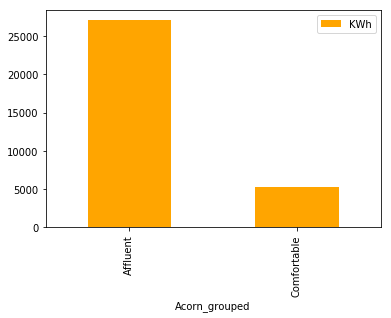

In [12]:
data.groupby('Acorn_grouped').sum().plot.bar(color = ['orange'])

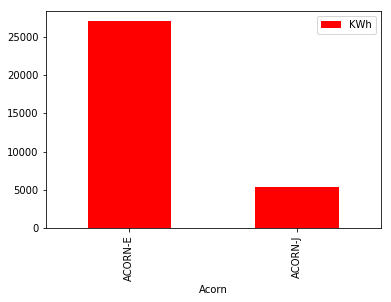

In [13]:
data.groupby('Acorn').sum().plot.bar(color = ['red'])

In [14]:
data['LCLid'].value_counts()

MAC000018    39081
MAC000021    39078
MAC000020    39078
Name: LCLid, dtype: int64

In [15]:
db_1 = data[data['LCLid']== top_3.index[0]]
db_2 = data[data['LCLid']== top_3.index[1]]
db_3 = data[data['LCLid']== top_3.index[2]]

In [16]:
db_1['LCLid'].value_counts()

MAC000018    39081
Name: LCLid, dtype: int64

In [17]:
db_2['LCLid'].value_counts()

MAC000020    39078
Name: LCLid, dtype: int64

In [18]:
db_3['LCLid'].value_counts()

MAC000021    39078
Name: LCLid, dtype: int64

# Data Pre-processing and choosing the parameter for ARIMA model

In [19]:
db_1.drop(['LCLid', 'Acorn','Acorn_grouped','stdorToU'],axis = 1,inplace=True)
db_2.drop(['LCLid', 'Acorn','Acorn_grouped','stdorToU'],axis = 1,inplace=True)
db_3.drop(['LCLid', 'Acorn','Acorn_grouped','stdorToU'],axis = 1,inplace=True)

In [20]:
db_1.head()

,DateTime,KWh
326612,2011-12-07 09:30:00,0.303
326613,2011-12-07 10:00:00,0.200
326614,2011-12-07 10:30:00,0.218
326615,2011-12-07 11:00:00,0.209
326616,2011-12-07 11:30:00,0.210


# Plotting the ACF charts

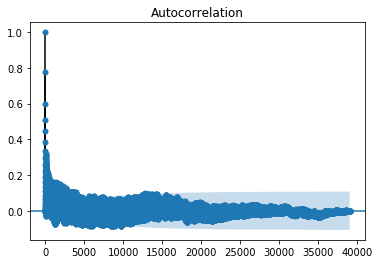

In [53]:
plot_acf(db_1)
pyplot.show()

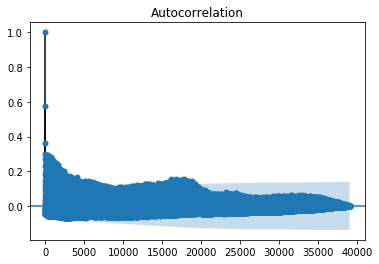

In [54]:
plot_acf(db_2)
pyplot.show()

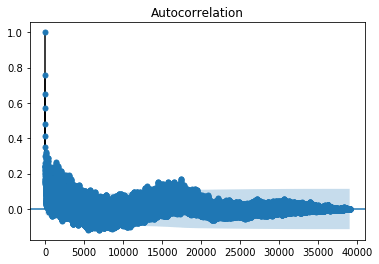

In [55]:
plot_acf(db_3)
pyplot.show()

In [23]:
def plotGraph(data):
    plt.figure(figsize=(25,15))
    plt.xlabel('Time')
    plt.ylabel('Power Used')
    plt.plot(db_1_day)

In [24]:
from statsmodels.tsa.stattools import adfuller

def testForStationarity(data):
    data.set_index('DateTime', inplace = True)
    movingAverage = data.rolling(window = 365).mean()
    movingSTD = data.rolling(window = 365).std()
    
    plt.figure(figsize=(25,15))
    original = plt.plot(data,color = 'blue',label = 'HouseHold')
    mean = plt.plot(movingAverage, color = 'black',label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'red', label = 'Rolling Std')
    plt.show(block = False)
    
    dfTest = adfuller(data['KWh'], autolag = 'AIC')
    dfOutput = pd.Series(dfTest[0:4], index = ['Test Stastic','p_value','Lags','No of observations'])
    for key,value in dfTest[4].items():
        dfOutput['Critical Value (%s)'%key] = value
    print(dfOutput)

# Stationarity Test

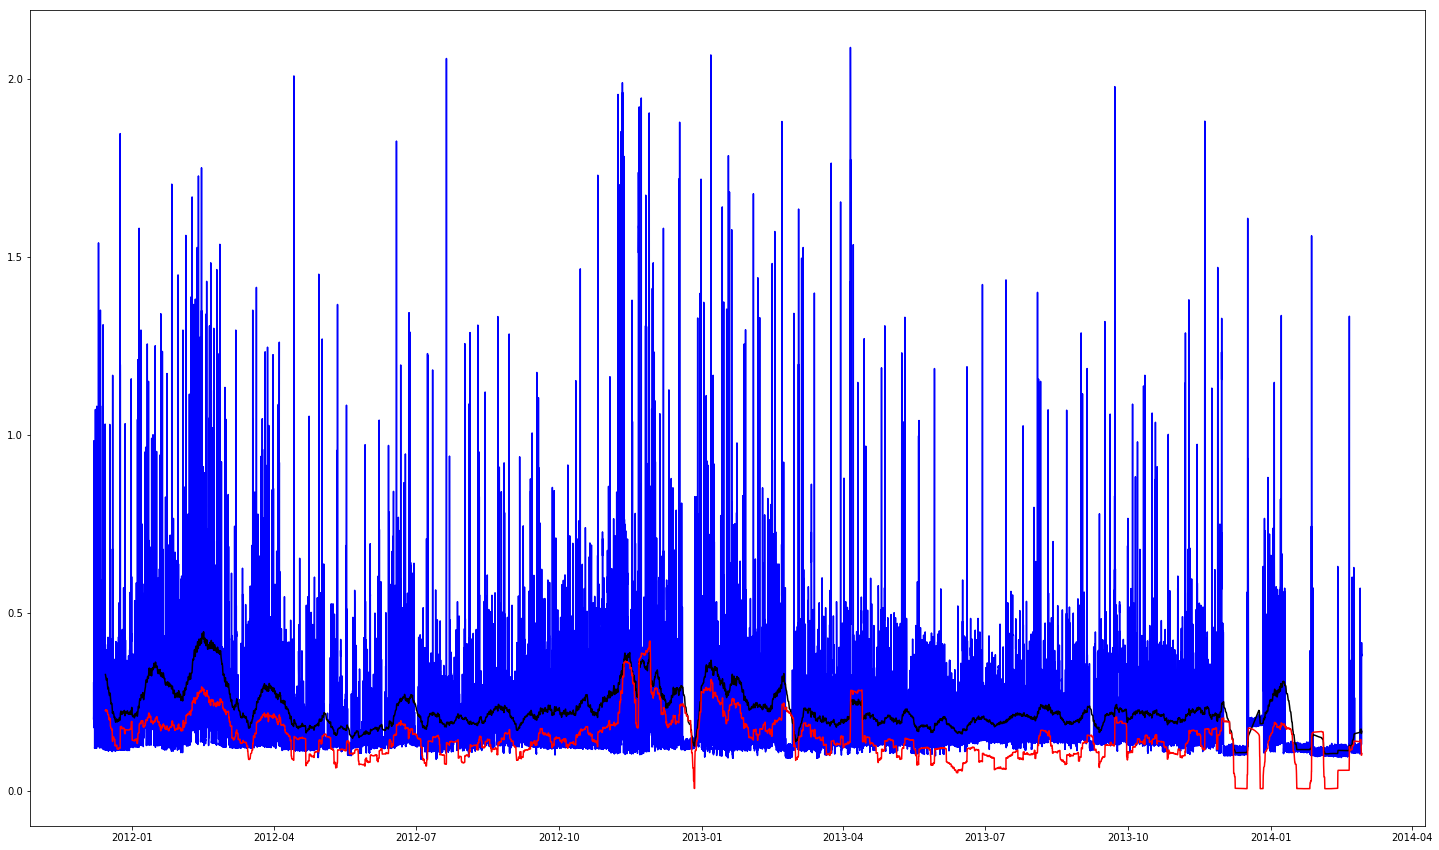

Test Stastic           -1.415570e+01
p_value                 2.123576e-26
Lags                    4.800000e+01
No of observations      3.903200e+04
Critical Value (1%)    -3.430518e+00
Critical Value (5%)    -2.861614e+00
Critical Value (10%)   -2.566809e+00
dtype: float64


In [25]:
testForStationarity(db_1)


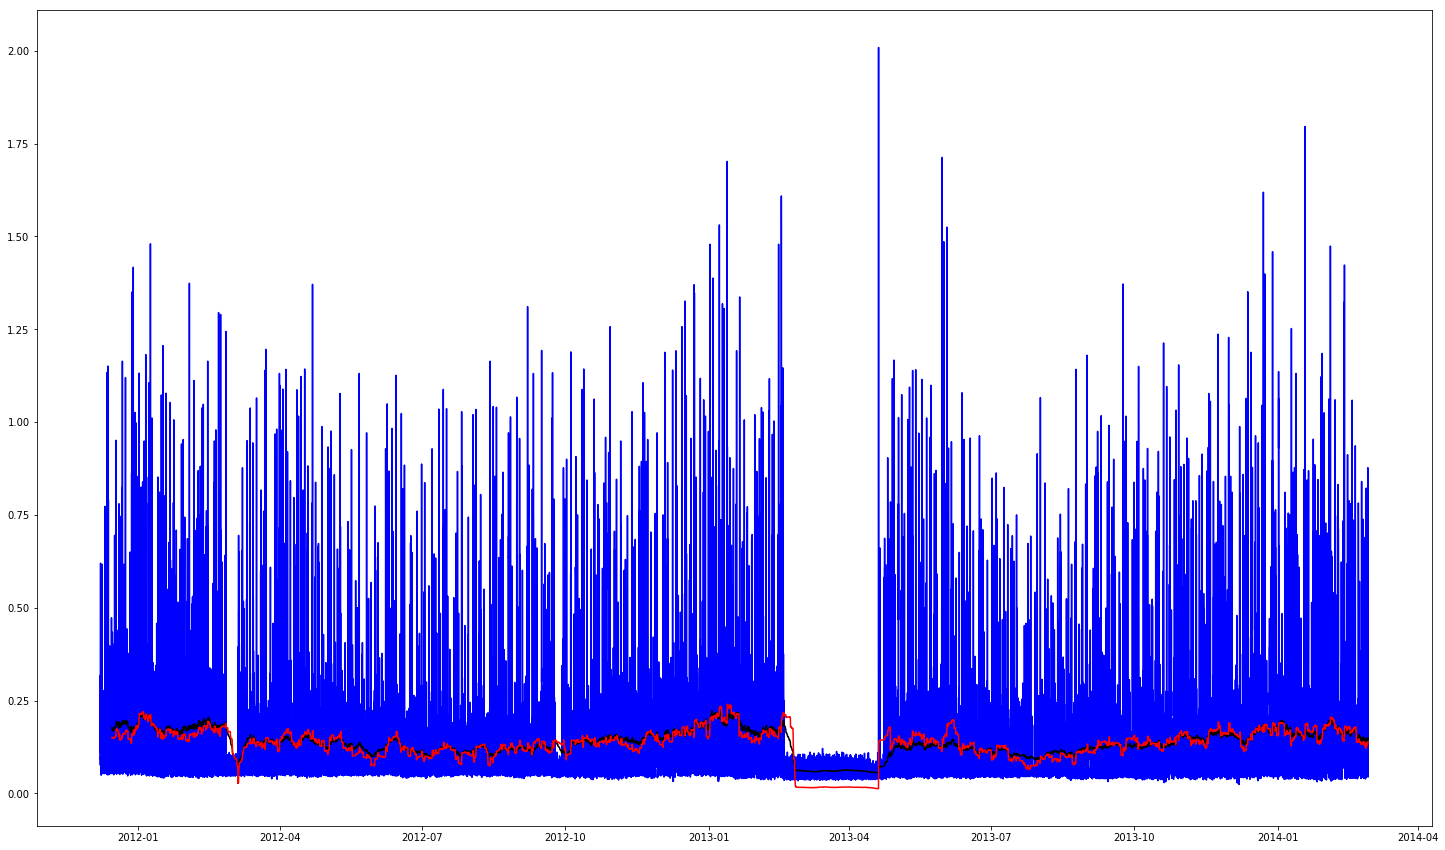

Test Stastic           -1.571035e+01
p_value                 1.361896e-28
Lags                    5.100000e+01
No of observations      3.902600e+04
Critical Value (1%)    -3.430518e+00
Critical Value (5%)    -2.861614e+00
Critical Value (10%)   -2.566809e+00
dtype: float64


In [26]:
testForStationarity(db_2)

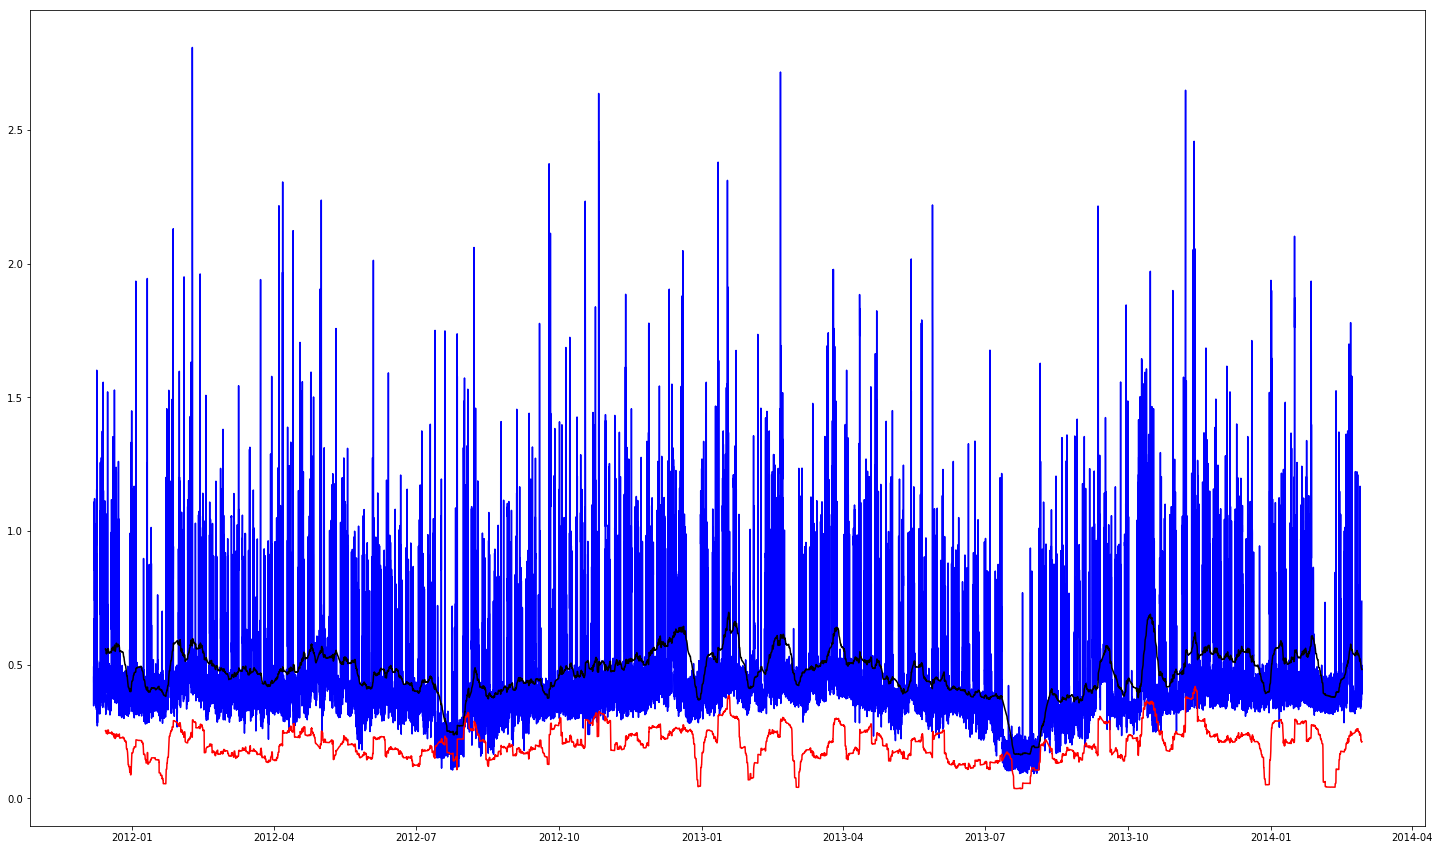

Test Stastic           -1.349557e+01
p_value                 3.046680e-25
Lags                    5.300000e+01
No of observations      3.902400e+04
Critical Value (1%)    -3.430518e+00
Critical Value (5%)    -2.861614e+00
Critical Value (10%)   -2.566809e+00
dtype: float64


In [27]:
testForStationarity(db_3)

In [28]:
db_1.reset_index(inplace = True)
db_1['Date'] = db_1['DateTime'].dt.date
db_1_copy = db_1.copy()
db_1_day = db_1.groupby('Date')
db_1_day = db_1_day.sum()
db_1_day.head()

,KWh
Date,
2011-12-07,10.040
2011-12-08,18.445
2011-12-09,15.911
2011-12-10,17.666
2011-12-11,18.674


# Electricity Usage of each Household

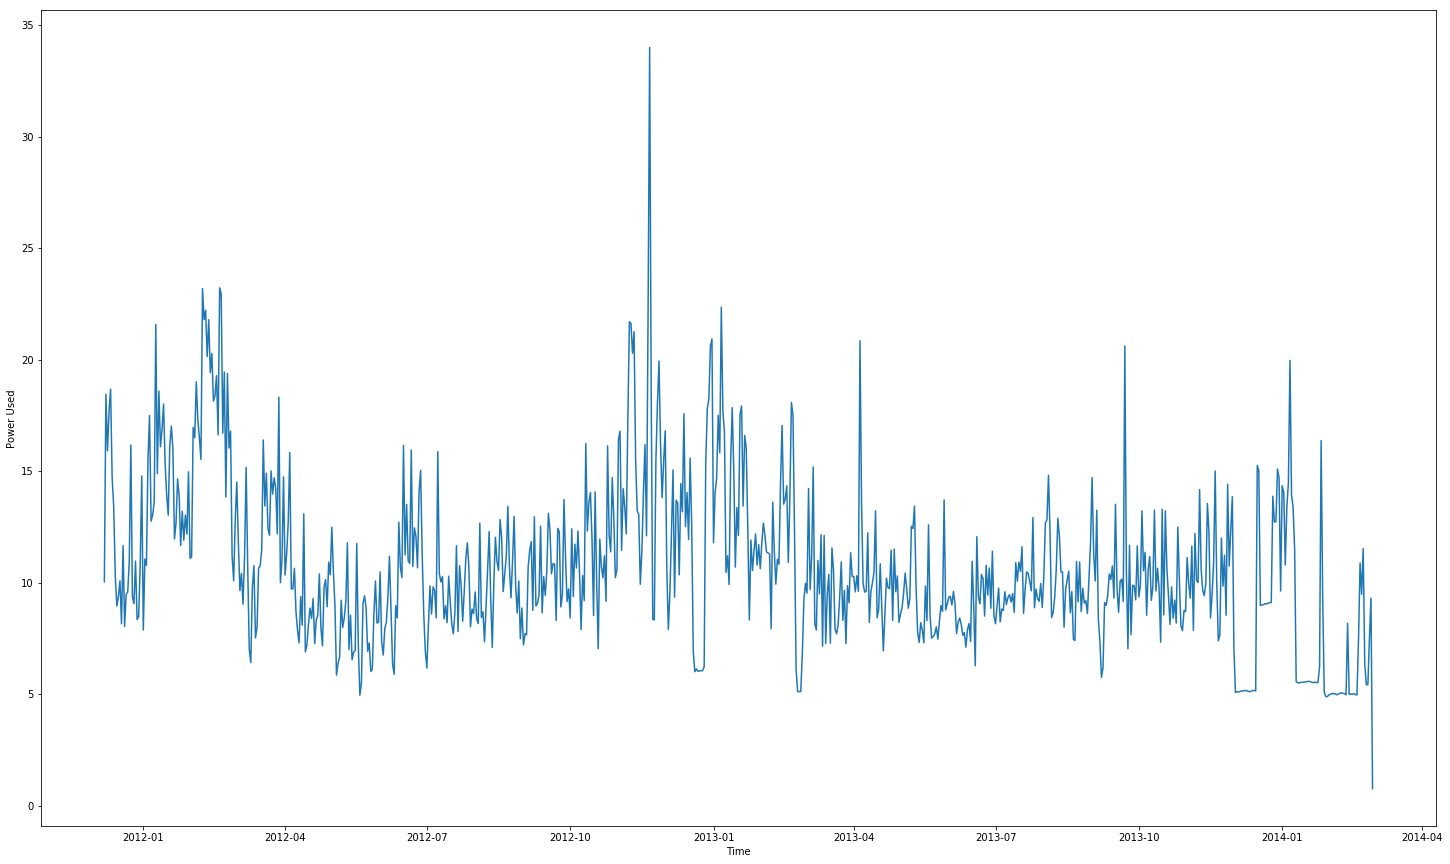

In [29]:
plotGraph(db_1_day)

In [30]:
db_2.reset_index(inplace = True)
db_2['Date'] = db_2['DateTime'].dt.date
db_2_copy = db_2.copy()
db_2_day = db_2.groupby('Date')
db_2_day = db_2_day.sum()
db_2_day.head()

,KWh
Date,
2011-12-07,6.153
2011-12-08,7.330
2011-12-09,6.184
2011-12-10,8.763
2011-12-11,10.810


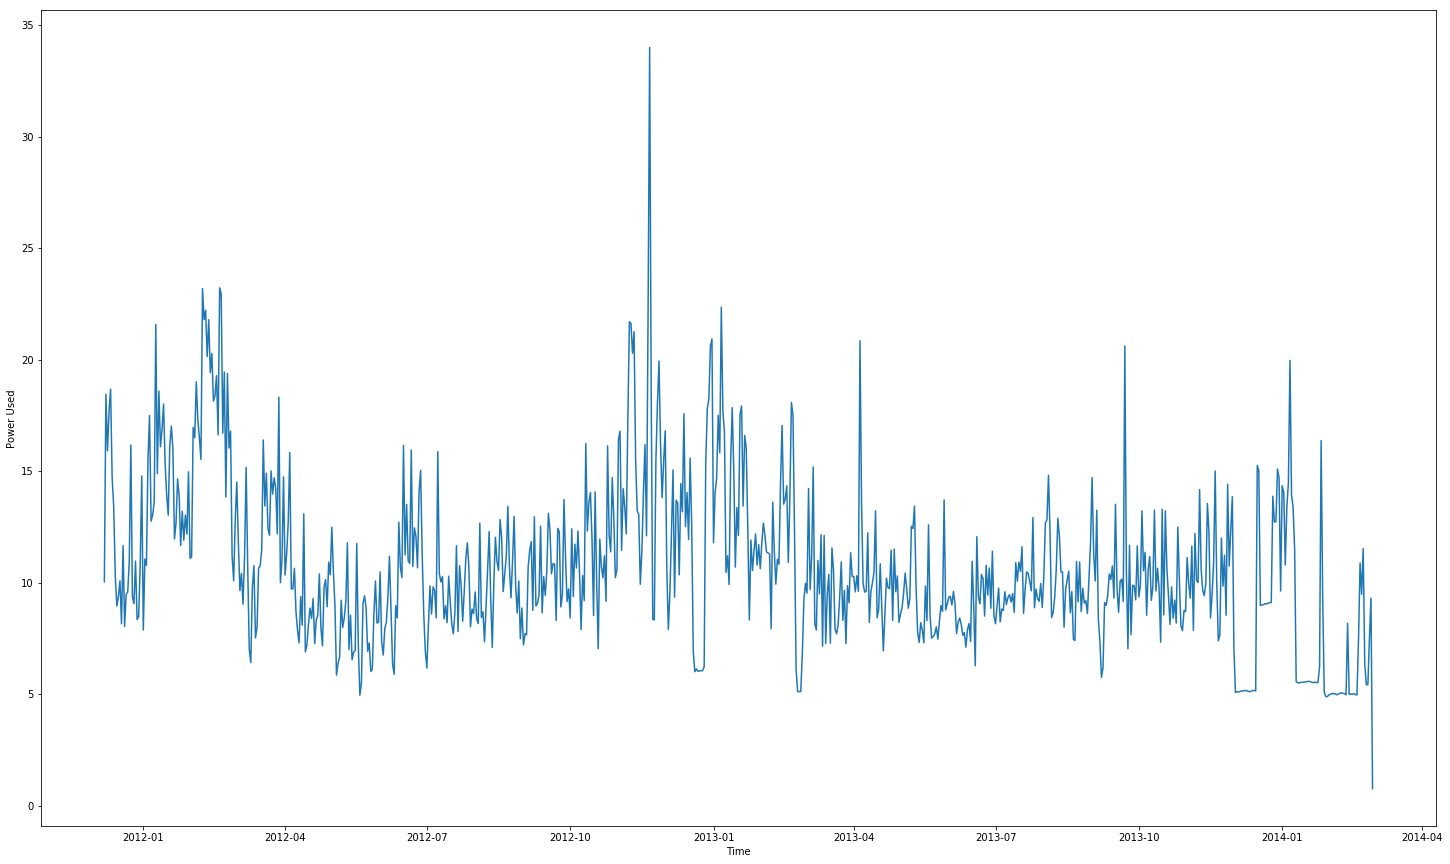

In [31]:
plotGraph(db_2_day)

In [32]:
db_3.reset_index(inplace = True)
db_3['Date'] = db_3['DateTime'].dt.date
db_3_copy = db_3.copy()
db_3_day = db_3.groupby('Date')
db_3_day = db_3_day.sum()
db_3_day.head()

,KWh
Date,
2011-12-07,18.361
2011-12-08,26.788
2011-12-09,24.606
2011-12-10,19.130
2011-12-11,25.739


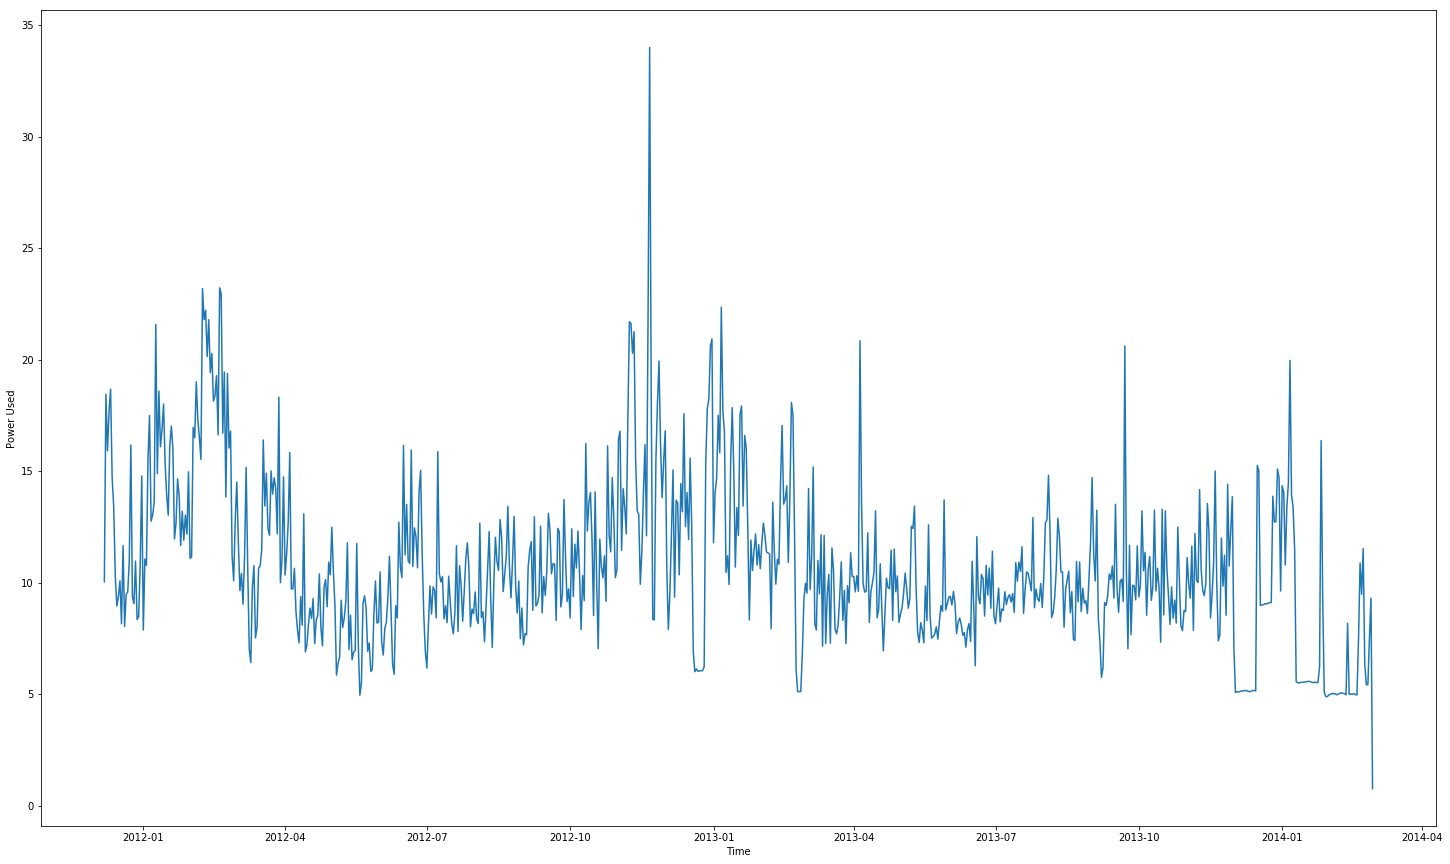

In [33]:
plotGraph(db_3_day)

In [34]:
db_1.head()

,DateTime,KWh,Date
0,2011-12-07 09:30:00,0.303,2011-12-07
1,2011-12-07 10:00:00,0.200,2011-12-07
2,2011-12-07 10:30:00,0.218,2011-12-07
3,2011-12-07 11:00:00,0.209,2011-12-07
4,2011-12-07 11:30:00,0.210,2011-12-07


In [35]:
db_1.drop('DateTime',axis = 1,inplace = True)
db_1.set_index('Date',inplace = True)
db_1.head()

,KWh
Date,
2011-12-07,0.303
2011-12-07,0.200
2011-12-07,0.218
2011-12-07,0.209
2011-12-07,0.210


In [36]:
db_2.drop('DateTime',axis = 1,inplace = True)
db_2.set_index('Date',inplace = True)
db_2.head()

,KWh
Date,
2011-12-07,0.275
2011-12-07,0.231
2011-12-07,0.204
2011-12-07,0.194
2011-12-07,0.317


In [37]:
db_3.drop('DateTime',axis = 1,inplace = True)
db_3.set_index('Date',inplace = True)
db_3.head()

,KWh
Date,
2011-12-07,0.491
2011-12-07,0.346
2011-12-07,0.473
2011-12-07,0.456
2011-12-07,0.432


In [38]:
db_1 = db_1['KWh']
db_2 = db_2['KWh']
db_3 = db_3['KWh']

In [39]:
db_1.head()

Date
2011-12-07    0.303
2011-12-07    0.200
2011-12-07    0.218
2011-12-07    0.209
2011-12-07    0.210
Name: KWh, dtype: float64

In [40]:
db_2.head()

Date
2011-12-07    0.275
2011-12-07    0.231
2011-12-07    0.204
2011-12-07    0.194
2011-12-07    0.317
Name: KWh, dtype: float64

In [41]:
db_3.head()

Date
2011-12-07    0.491
2011-12-07    0.346
2011-12-07    0.473
2011-12-07    0.456
2011-12-07    0.432
Name: KWh, dtype: float64

# Function for Model Fitting, Splitting the data for Train & Test and Forecasting

In [42]:
def predictionBlock(data):
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    
    x = data.values
    train, test = x[0:39030], x[39030:len(x)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    
    error_1 = mean_squared_error(test, predictions)
    error_2 = mean_absolute_error(test,predictions)
    
    
    pyplot.plot(test,label='Actual', color = 'green')
    pyplot.plot(predictions, color='orange',label='predicted')
    plt.legend()
    pyplot.show()
    
    print('Mean Squared Error Test: %.3f' % error_1)
    print('Mean Absolute Error Test: %.3f' % error_2)
    
    predicted = pd.DataFrame()
    predicted = pd.DataFrame({'Actual':test, 'Predicted':predictions})
    return (test,predicted)
    
    

                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                39080
Model:                 ARIMA(5, 1, 0)   Log Likelihood               30192.813
Method:                       css-mle   S.D. of innovations              0.112
Date:                Sun, 22 Sep 2019   AIC                         -60371.625
Time:                        16:25:54   BIC                         -60311.612
Sample:                             1   HQIC                        -60352.609
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.947e-06      0.000      0.009      0.993      -0.001       0.001
ar.L1.D.KWh    -0.1696      0.005    -33.604      0.000      -0.180      -0.160
ar.L2.D.KWh    -0.2454      0.005    -48.127    

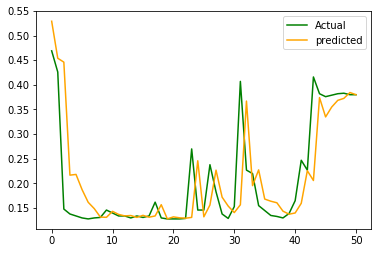

Mean Squared Error Test: 0.006
Mean Absolute Error Test: 0.043


In [43]:
result = predictionBlock(db_1)

In [44]:
test_result_1 = result[1]['Actual']
predicted_result_1 = result[1]['Predicted']
#test_result
predicted_result_1[1][0]

0.45396285019644966

                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                39077
Model:                 ARIMA(5, 1, 0)   Log Likelihood               27173.282
Method:                       css-mle   S.D. of innovations              0.121
Date:                Sun, 22 Sep 2019   AIC                         -54332.565
Time:                        16:26:47   BIC                         -54272.552
Sample:                             1   HQIC                        -54313.548
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.325e-06      0.000     -0.016      0.987      -0.001       0.001
ar.L1.D.KWh    -0.3920      0.005    -77.759      0.000      -0.402      -0.382
ar.L2.D.KWh    -0.3631      0.005    -67.729    

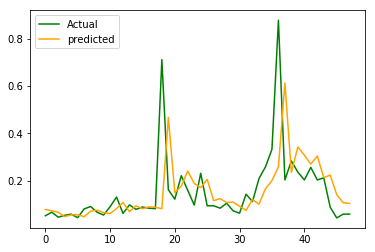

Mean Squared Error Test: 0.025
Mean Absolute Error Test: 0.082


In [45]:
result = predictionBlock(db_2)

In [46]:
test_result_2 = result[1]['Actual']
predicted_result_2 = result[1]['Predicted']
#test_result
predicted_result_2[1][0]

0.07404813052830009

                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                39077
Model:                 ARIMA(5, 1, 0)   Log Likelihood               18582.135
Method:                       css-mle   S.D. of innovations              0.150
Date:                Sun, 22 Sep 2019   AIC                         -37150.269
Time:                        16:27:45   BIC                         -37090.256
Sample:                             1   HQIC                        -37131.253
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.807e-06      0.000      0.013      0.990      -0.001       0.001
ar.L1.D.KWh    -0.3326      0.005    -65.823      0.000      -0.343      -0.323
ar.L2.D.KWh    -0.1735      0.005    -32.688    

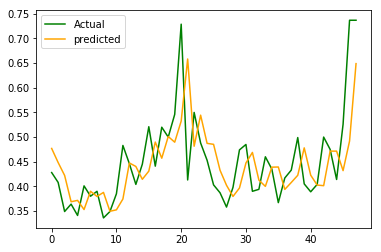

Mean Squared Error Test: 0.006
Mean Absolute Error Test: 0.057


In [47]:
result = predictionBlock(db_3)

In [48]:
test_result_3 = result[1]['Actual']
predicted_result_3 = result[1]['Predicted']
#test_result
predicted_result_1[1][0]

0.45396285019644966

# Final Result of the 3 households

In [49]:
final_result = pd.DataFrame({'Actual_1': test_result_1,'Predicted_1' : predicted_result_1,'Actual_2': test_result_2,'Predicted_2' : predicted_result_2,'Actual_3': test_result_3,'Predicted_3' : predicted_result_3})

In [50]:
final_result

,Actual_1,Predicted_1,Actual_2,Predicted_2,Actual_3,Predicted_3
0,0.469,[0.5290275097098023],0.053,[0.07966026630792558],0.428,[0.4769220055606986]
1,0.426,[0.45396285019644966],0.068,[0.07404813052830009],0.408,[0.44833107317845]
2,0.148,[0.4460565075062102],0.047,[0.06769973770825487],0.349,[0.4221778735939901]
3,0.138,[0.21679556847196102],0.055,[0.04975775203419878],0.364,[0.3688121104720631]
4,0.134,[0.21825947690559325],0.060,[0.056818672309585413],0.341,[0.371564129769895]
5,0.130,[0.18729500557349454],0.045,[0.05785183924388838],0.401,[0.3530230916790299]
6,0.128,[0.16171254639093502],0.082,[0.04894825827015071],0.380,[0.3900963421925751]
7,0.130,[0.1488397198568378],0.092,[0.07222903471218384],0.390,[0.37952749676487507]
8,0.131,[0.13173663402249403],0.068,[0.07702817284179225],0.336,[0.3877315869719912]
9,0.146,[0.13125009018267988],0.056,[0.0661900391329705],0.349,[0.34947467742426497]


# Saving the output as CSV file

In [52]:
final_result.to_csv('output.csv',index = False)